In [1]:
pip install pandas-datareader yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install QuantStats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.1 MB/s eta 0:00:00


In [4]:
import pandas as pd

url = 'https://github.com/alexbernal0/QEP/raw/main/Crude.xlsx'
sheet_name = 'Trades List'

df = pd.read_excel(url, sheet_name=sheet_name)

# Drop all columns except '#', 'Date/Time', and 'Profit/Loss'
df = df[['#','Signal', 'Date/Time','Price', 'Profit/Loss']]

# Add a new column called 'Exit Date/Time' with the same data as 'Date/Time'
df['Exit Date/Time'] = df['Date/Time']

# Shift the contents of the 'Exit Date/Time' column up one row
df['Exit Date/Time'] = df['Exit Date/Time'].shift(-1)

#Shift the contents of the 'Profit/Loss' column up one row
df['Profit/Loss'] = df['Profit/Loss'].shift(-1)

# Add a new column called 'Exit Date/Time' with the same data as 'Date/Time'
df['ExitPrice'] = df['Price']

# Shift the contents of the 'Exit Date/Time' column up one row
df['ExitPrice'] = df['ExitPrice'].shift(-1)

# Drop all rows where there is a NaN in the '#' column
df = df.dropna(subset=['#'])

df['Date'] = df['Date/Time']

# convert the 'date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Switch places of 'Profit/Loss' and 'closedDate' columns
df = df[['#', 'Signal', 'Date','Price', 'Exit Date/Time','ExitPrice', 'Profit/Loss']]

df.head()

,#,Signal,Date,Price,Exit Date/Time,ExitPrice,Profit/Loss
0,1.0,Buy,2013-05-28,104.66,2013-05-30,103.26,-14000.0
2,2.0,Short,2013-05-30,103.26,2013-06-07,105.68,-24200.0
4,3.0,Buy,2013-06-07,105.68,2013-06-24,104.56,-11200.0
6,4.0,Short,2013-06-24,104.56,2013-06-28,105.94,-13800.0
8,5.0,Buy,2013-06-28,105.94,2013-07-31,114.54,86000.0


In [5]:
import pandas as pd

# specify the file path
file_path = 'https://raw.githubusercontent.com/alexbernal0/QEP/main/CrudeData.txt'

# read in the data with comma delimiter
df2 = pd.read_csv(file_path, delimiter=',', usecols=['Date', 'Open'])

# convert the date format
df2['Date'] = pd.to_datetime(df2['Date']).dt.strftime('%Y-%m-%d')

# convert the 'date' column to datetime
df2['Date'] = pd.to_datetime(df2['Date'])

# display the first few rows of the dataframe
df2.head()

,Date,Open
0,2013-03-27,106.41
1,2013-03-28,106.91
2,2013-03-29,107.46
3,2013-04-01,107.59
4,2013-04-02,107.23


In [6]:
# perform the left join on the 'Date' column
df_joined = pd.merge(df, df2, on='Date', how='left')

df_joined.head(20)

,#,Signal,Date,Price,Exit Date/Time,ExitPrice,Profit/Loss,Open
0,1.0,Buy,2013-05-28,104.66,2013-05-30,103.26,-14000.0,103.54
1,2.0,Short,2013-05-30,103.26,2013-06-07,105.68,-24200.0,102.54
2,3.0,Buy,2013-06-07,105.68,2013-06-24,104.56,-11200.0,104.37
3,4.0,Short,2013-06-24,104.56,2013-06-28,105.94,-13800.0,103.23
4,5.0,Buy,2013-06-28,105.94,2013-07-31,114.54,86000.0,106.19
5,6.0,Short,2013-07-31,114.54,2013-08-01,117.40,-28600.0,112.66
6,7.0,Buy,2013-08-01,117.40,2013-08-08,112.91,-44900.0,114.77
7,8.0,Short,2013-08-08,112.91,2013-08-13,116.34,-34300.0,113.69
8,9.0,Buy,2013-08-13,116.34,2013-08-22,114.68,-16600.0,115.66
9,10.0,Short,2013-08-22,114.68,2013-08-26,115.57,-8900.0,113.51


In [7]:
# second Join for the exit
df3 = df2
df3['Exit Date/Time'] = df3['Date']
# Switch places of 'Profit/Loss' and 'closedDate' columns
df3 = df3[['Exit Date/Time','Open']]

df3.head()

,Exit Date/Time,Open
0,2013-03-27,106.41
1,2013-03-28,106.91
2,2013-03-29,107.46
3,2013-04-01,107.59
4,2013-04-02,107.23


In [8]:
# perform the left join on the 'Date' column
df_joined2 = pd.merge(df_joined, df3, on='Exit Date/Time', how='left')

df_joined2

,#,Signal,Date,Price,Exit Date/Time,ExitPrice,Profit/Loss,Open_x,Open_y
0,1.0,Buy,2013-05-28,104.66,2013-05-30,103.26,-14000.0,103.54,102.54
1,2.0,Short,2013-05-30,103.26,2013-06-07,105.68,-24200.0,102.54,104.37
2,3.0,Buy,2013-06-07,105.68,2013-06-24,104.56,-11200.0,104.37,103.23
3,4.0,Short,2013-06-24,104.56,2013-06-28,105.94,-13800.0,103.23,106.19
4,5.0,Buy,2013-06-28,105.94,2013-07-31,114.54,86000.0,106.19,112.66
...,...,...,...,...,...,...,...,...,...
144,145.0,Buy,2023-01-13,80.54,2023-02-01,76.82,-37200.0,79.00,79.47
145,146.0,Short,2023-02-01,76.82,2023-02-13,80.55,-37300.0,79.47,80.35
146,147.0,Buy,2023-02-13,80.55,2023-02-20,77.58,-29700.0,80.35,NaN
147,148.0,Short,2023-02-20,77.58,2023-03-03,79.85,-22700.0,NaN,78.06


In [9]:
df4 = df_joined2


# specify the file path
file_path = 'https://raw.githubusercontent.com/alexbernal0/QEP/main/CrudeOpenJoin.csv'

# read in the CSV file as a dataframe
df4 = pd.read_csv(file_path)

# create a new column 'Profit'
df4['Profit'] = ""

# calculate the profit based on the 'Signal' column
df4.loc[df4['Signal'] == 'Buy', 'Profit'] = (df4['OpenExitPrice'] - df4['OpenPrice']) * 1000
df4.loc[df4['Signal'] == 'Short', 'Profit'] = (df4['OpenPrice'] - df4['OpenExitPrice']) * 1000

df4['Profit/Loss'] = df4['Profit/Loss'] / 10

df4.head(50)

,,#,Signal,Date,Close2ClosePrice,Exit Date/Time,CloseExitPrice,Profit/Loss,OpenPrice,OpenExitPrice,Profit
0,0,1,Buy,5/28/2013 0:00,104.66,5/30/2013 0:00,103.26,-1400.0,103.54,102.54,-1000.0
1,1,2,Short,5/30/2013 0:00,103.26,6/7/2013 0:00,105.68,-2420.0,102.54,104.37,-1830.0
2,2,3,Buy,6/7/2013 0:00,105.68,6/24/2013 0:00,104.56,-1120.0,104.37,103.23,-1140.0
3,3,4,Short,6/24/2013 0:00,104.56,6/28/2013 0:00,105.94,-1380.0,103.23,106.19,-2960.0
4,4,5,Buy,6/28/2013 0:00,105.94,7/31/2013 0:00,114.54,8600.0,106.19,112.66,6470.0
5,5,6,Short,7/31/2013 0:00,114.54,8/1/2013 0:00,117.40,-2860.0,112.66,114.77,-2110.0
6,6,7,Buy,8/1/2013 0:00,117.40,8/8/2013 0:00,112.91,-4490.0,114.77,113.69,-1080.0
7,7,8,Short,8/8/2013 0:00,112.91,8/13/2013 0:00,116.34,-3430.0,113.69,115.66,-1970.0
8,8,9,Buy,8/13/2013 0:00,116.34,8/22/2013 0:00,114.68,-1660.0,115.66,113.51,-2150.0
9,9,10,Short,8/22/2013 0:00,114.68,8/26/2013 0:00,115.57,-890.0,113.51,116.56,-3050.0


In [10]:
# calculate the cumulative sum of the 'Profit/Loss' column and 'Profit' column
cumulative_profit_loss = df4['Profit/Loss'].cumsum()
cumulative_profit = df4['Profit'].cumsum()

# print out the cumulative sum of the 'Profit/Loss' column and 'Profit' column
print("Cumulative Sum of Profit/Loss:\n", cumulative_profit_loss)
print("\nCumulative Sum of Profit:\n", cumulative_profit)

Cumulative Sum of Profit/Loss:
 0       -1400.0
1       -3820.0
2       -4940.0
3       -6320.0
4        2280.0
         ...   
144    100080.0
145     96350.0
146     93380.0
147     91110.0
148     88110.0
Name: Profit/Loss, Length: 149, dtype: float64

Cumulative Sum of Profit:
 0       -1000.0
1       -2830.0
2       -3970.0
3       -6930.0
4        -460.0
         ...   
144    167450.0
145    166570.0
146         NaN
147         NaN
148    164330.0
Name: Profit, Length: 149, dtype: object


In [11]:
# calculate the cumulative sum of the 'Profit/Loss' column and save it in a new column 'Cumulative_PnL'
df4['Cumulative_PnL'] = df4['Profit/Loss'].cumsum()

# calculate the cumulative sum of the 'Profit' column and save it in a new column 'Cumulative_Profit'
df4['Cumulative_Profit'] = df4['Profit'].cumsum()

df4.head()

,,#,Signal,Date,Close2ClosePrice,Exit Date/Time,CloseExitPrice,Profit/Loss,OpenPrice,OpenExitPrice,Profit,Cumulative_PnL,Cumulative_Profit
0,0,1,Buy,5/28/2013 0:00,104.66,5/30/2013 0:00,103.26,-1400.0,103.54,102.54,-1000.0,-1400.0,-1000.0
1,1,2,Short,5/30/2013 0:00,103.26,6/7/2013 0:00,105.68,-2420.0,102.54,104.37,-1830.0,-3820.0,-2830.0
2,2,3,Buy,6/7/2013 0:00,105.68,6/24/2013 0:00,104.56,-1120.0,104.37,103.23,-1140.0,-4940.0,-3970.0
3,3,4,Short,6/24/2013 0:00,104.56,6/28/2013 0:00,105.94,-1380.0,103.23,106.19,-2960.0,-6320.0,-6930.0
4,4,5,Buy,6/28/2013 0:00,105.94,7/31/2013 0:00,114.54,8600.0,106.19,112.66,6470.0,2280.0,-460.0


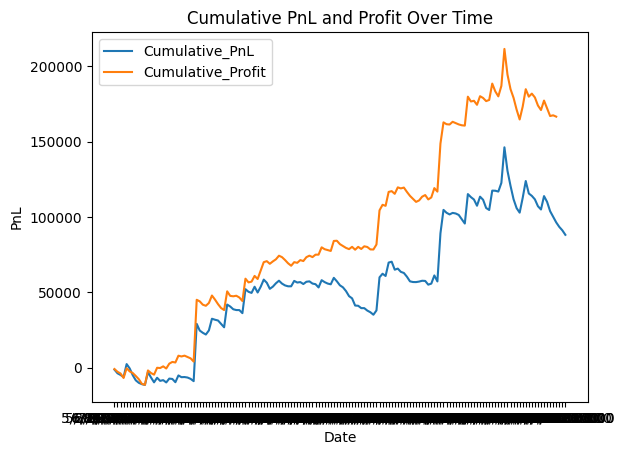

In [12]:
import matplotlib.pyplot as plt

# plot the Cumulative_Pnl and Cumulative_Profit columns against Date
plt.plot(df4['Date'], df4['Cumulative_PnL'], label='Cumulative_PnL')
plt.plot(df4['Date'], df4['Cumulative_Profit'], label='Cumulative_Profit')

# add x and y axis labels and a title
plt.xlabel('Date')
plt.ylabel('PnL')
plt.title('Cumulative PnL and Profit Over Time')

# add a legend to the plot
plt.legend()

# show the plot
plt.show()

In [13]:
import pandas as pd
import quantstats as qs

In [14]:
# specify the file path
url = "https://raw.githubusercontent.com/alexbernal0/QEP/main/CrudeOpen2Open.csv"
df = pd.read_csv(url)

# create a new column 'Profit'
df['Profit'] = ""

# calculate the profit based on the 'Signal' column
df.loc[df['Signal'] == 'Buy', 'Profit'] = (df['OpenExitPrice'] - df['OpenPrice']) * 1000
df.loc[df['Signal'] == 'Short', 'Profit'] = (df['OpenPrice'] - df['OpenExitPrice']) * 1000

#using 40k ($6000 margin) to based 15% Margin to equity
df['CumPL'] = 40000 + df['Profit'].cumsum()

# Convert the 'Profit/Loss' and 'equity' columns to numeric data type
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')
df['CumPL'] = pd.to_numeric(df['CumPL'], errors='coerce')

# Create a new column called 'returnPerc'
df['rtnPerc'] = df['CumPL'].pct_change()

# Set the first value of 'returnPerc' to fill NaN
df.at[df.index[0], 'rtnPerc'] = -0.025

# Convert the date column to a pandas datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate the drawdown
cumulative_return = (1 + df['rtnPerc']).cumprod()
drawdown = (cumulative_return.cummax() - cumulative_return) / cumulative_return.cummax()

# Add a new column for drawdown
df['Drawdown'] = -drawdown



df.head(20)

,#,Signal,OpenPrice,Exit Date/Time,OpenExitPrice,Profit,CumPL,rtnPerc,Drawdown
Date,,,,,,,,,
2013-05-28,1,Buy,103.54,5/30/2013 0:00,102.54,-1000.0,39000.0,-0.025000,-0.000000
2013-05-30,2,Short,102.54,6/7/2013 0:00,104.37,-1830.0,37170.0,-0.046923,-0.046923
2013-06-07,3,Buy,104.37,6/24/2013 0:00,103.23,-1140.0,36030.0,-0.030670,-0.076154
2013-06-24,4,Short,103.23,6/28/2013 0:00,106.19,-2960.0,33070.0,-0.082154,-0.152051
2013-06-28,5,Buy,106.19,7/31/2013 0:00,112.66,6470.0,39540.0,0.195646,-0.000000
2013-07-31,6,Short,112.66,8/1/2013 0:00,114.77,-2110.0,37430.0,-0.053364,-0.053364
2013-08-01,7,Buy,114.77,8/8/2013 0:00,113.69,-1080.0,36350.0,-0.028854,-0.080678
2013-08-08,8,Short,113.69,8/13/2013 0:00,115.66,-1970.0,34380.0,-0.054195,-0.130501
2013-08-13,9,Buy,115.66,8/22/2013 0:00,113.51,-2150.0,32230.0,-0.062536,-0.184876


In [15]:
# Calculate the cumulative return and drawdown
cumulative_return = (1 + df['CumPL'].pct_change()).cumprod()
drawdown = (cumulative_return.cummax() - cumulative_return) / cumulative_return.cummax()

# Calculate the average drawdown
average_drawdown = -1 * drawdown.mean()

# Calculate the average drawdown time in days
drawdown_duration = drawdown[drawdown > 0].index.to_series().diff().mean().days

# Calculate the recovery factor
recovery_factor = -1 * cumulative_return.min() / average_drawdown

# Print the portfolio statistics

print(f"Average drawdown: {average_drawdown:.2%}")
print(f"Average drawdown duration: {drawdown_duration} days")
print(f"Recovery factor: {recovery_factor:.2f}")

Average drawdown: -4.50%
Average drawdown duration: 32 days
Recovery factor: 16.25


In [16]:
# Calculate the total return of the portfolio
total_return = df['CumPL'][-1] / df['CumPL'][0] - 1

# Calculate the number of years that the portfolio has been invested
num_years = (df.index[-1] - df.index[0]).days / 365.25

# Calculate the CAGR
cagr = (1 + total_return)**(1/num_years) - 1

print('CAGR: {:.2%}'.format(cagr))

CAGR: 18.49%


In [17]:
# Calculate the monthly returns
monthly_returns = df['CumPL'].resample('M').last().pct_change()

# Display the monthly returns as a DataFrame
monthly_returns_df = pd.DataFrame({'Monthly Return': monthly_returns * 100})
print(monthly_returns_df.tail(50))

            Monthly Return
Date                      
2019-02-28        5.782221
2019-03-31        0.000000
2019-04-30        0.000000
2019-05-31        1.922095
2019-06-30       -0.426038
2019-07-31        0.339772
2019-08-31       -4.684267
2019-09-30        0.947368
2019-10-31        0.690824
2019-11-30        0.000000
2019-12-31       -1.016181
2020-01-31        4.047603
2020-02-29       18.577174
2020-03-31        0.000000
2020-04-30        0.000000
2020-05-31        7.467670
2020-06-30        0.000000
2020-07-31       -0.601667
2020-08-31       -0.104193
2020-09-30        0.034767
2020-10-31       -0.397200
2020-11-30        9.575794
2020-12-31        0.000000
2021-01-31        0.000000
2021-02-28        0.000000
2021-03-31       -1.446638
2021-04-30        0.212334
2021-05-31        1.404883
2021-06-30        0.000000
2021-07-31       -1.485351
2021-08-31        5.362412
2021-09-30        0.000000
2021-10-31        0.000000
2021-11-30       -0.669555
2021-12-31       10.815931
2

In [18]:
# Calculate the yearly returns
yearly_returns = df['CumPL'].resample('Y').last().pct_change()

# Display the yearly returns as a DataFrame
yearly_returns_df = pd.DataFrame({'Yearly Return': yearly_returns * 100})
print(yearly_returns_df.head(11))

            Yearly Return
Date                     
2013-12-31            NaN
2014-12-31     133.819483
2015-12-31      16.499941
2016-12-31      15.405597
2017-12-31       8.569678
2018-12-31      16.383133
2019-12-31       5.943886
2020-12-31      43.738966
2021-12-31      14.425439
2022-12-31     -15.695941
2023-12-31      -3.640651


In [19]:
# Calculate monthly returns
monthly_returns = df['CumPL'].resample('M').last().pct_change()

# Find the best and worst performing months
best_month = monthly_returns.idxmax().strftime('%B %Y')
best_month_return = monthly_returns.max() * 100
worst_month = monthly_returns.idxmin().strftime('%B %Y')
worst_month_return = monthly_returns.min() * 100

# Display the results
print(f"Best performing month: {best_month}, Return: {best_month_return:.2f}%")
print(f"Worst performing month: {worst_month}, Return: {worst_month_return:.2f}%")

Best performing month: October 2014, Return: 93.38%
Worst performing month: August 2013, Return: -23.88%


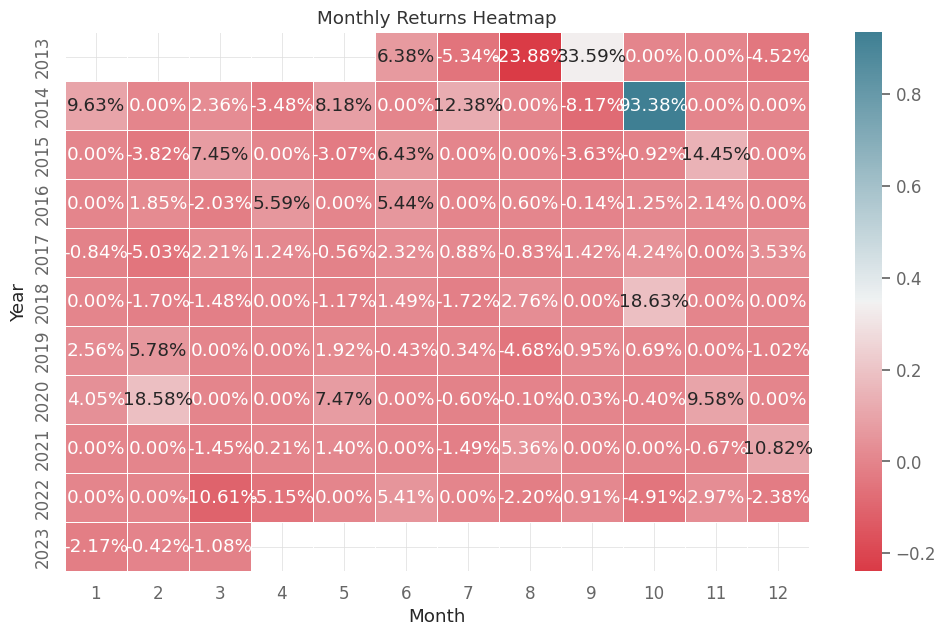

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate monthly returns
monthly_returns = df['CumPL'].resample('M').last().pct_change()

# Create a pivot table of monthly returns
monthly_returns_pivot = monthly_returns.reset_index().pivot_table(index=monthly_returns.index.year, columns=monthly_returns.index.month, values='CumPL')

# Create heatmap
fig, ax = plt.subplots(figsize=(12,7))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(monthly_returns_pivot, annot=True, fmt=".2%", linewidths=0.5, ax=ax, cmap=cmap)
plt.title('Monthly Returns Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

In [21]:
# Calculate yearly returns
yearly_returns = df['CumPL'].resample('Y').last().pct_change()

# Find the best and worst performing years
best_years = yearly_returns.sort_values(ascending=False).head(3)
worst_years = yearly_returns.sort_values().head(3)

# Display the results
print("Best performing years:")
for year, return_ in best_years.items():
    print(f"- Year: {year.year}, Return: {return_*100:.2f}%")

print("\nWorst performing years:")
for year, return_ in worst_years.items():
    print(f"- Year: {year.year}, Return: {return_*100:.2f}%")

Best performing years:
- Year: 2014, Return: 133.82%
- Year: 2020, Return: 43.74%
- Year: 2015, Return: 16.50%

Worst performing years:
- Year: 2022, Return: -15.70%
- Year: 2023, Return: -3.64%
- Year: 2019, Return: 5.94%


In [22]:
# Calculate monthly, quarterly, and yearly returns
monthly_returns = df['CumPL'].resample('M').last().pct_change()
quarterly_returns = df['CumPL'].resample('Q').last().pct_change()
yearly_returns = df['CumPL'].resample('Y').last().pct_change()

# Calculate percentage of positive months, quarters, and years
positive_months = (monthly_returns > 0).mean() * 100
positive_quarters = (quarterly_returns > 0).mean() * 100
positive_years = (yearly_returns > 0).mean() * 100

#Display the results
print(f"Percentage of positive months: {positive_months:.2f}%")
print(f"Percentage of positive quarters: {positive_quarters:.2f}%")
print(f"Percentage of positive years: {positive_years:.2f}%")

Percentage of positive months: 36.97%
Percentage of positive quarters: 60.00%
Percentage of positive years: 72.73%


In [23]:
df = df.reset_index()

# calculate the drawdowns
df['peak'] = df['CumPL'].cummax()
df['drawdown'] = df['CumPL'] - df['peak']
df['drawdown_pct'] = df['drawdown'] / df['peak'] * 100

# get the top 10 drawdowns
top_10_drawdowns = df.sort_values('drawdown_pct').head(10)[['Date', 'drawdown_pct']]

# rename columns
top_10_drawdowns = top_10_drawdowns.rename(columns={'Date': 'Start Date', 'drawdown_pct': 'Drawdown (%)'})

# reset index
top_10_drawdowns = top_10_drawdowns.reset_index(drop=True)

# display the table
print(top_10_drawdowns[['Start Date', 'Drawdown (%)']])

  Start Date  Drawdown (%)
0 2013-08-26    -27.946383
1 2013-08-22    -26.201315
2 2023-03-03    -18.765157
3 2022-04-26    -18.622033
4 2013-08-13    -18.487607
5 2023-02-01    -17.874607
6 2023-01-05    -17.711605
7 2023-01-13    -17.524749
8 2022-10-27    -16.129289
9 2022-04-18    -16.025921


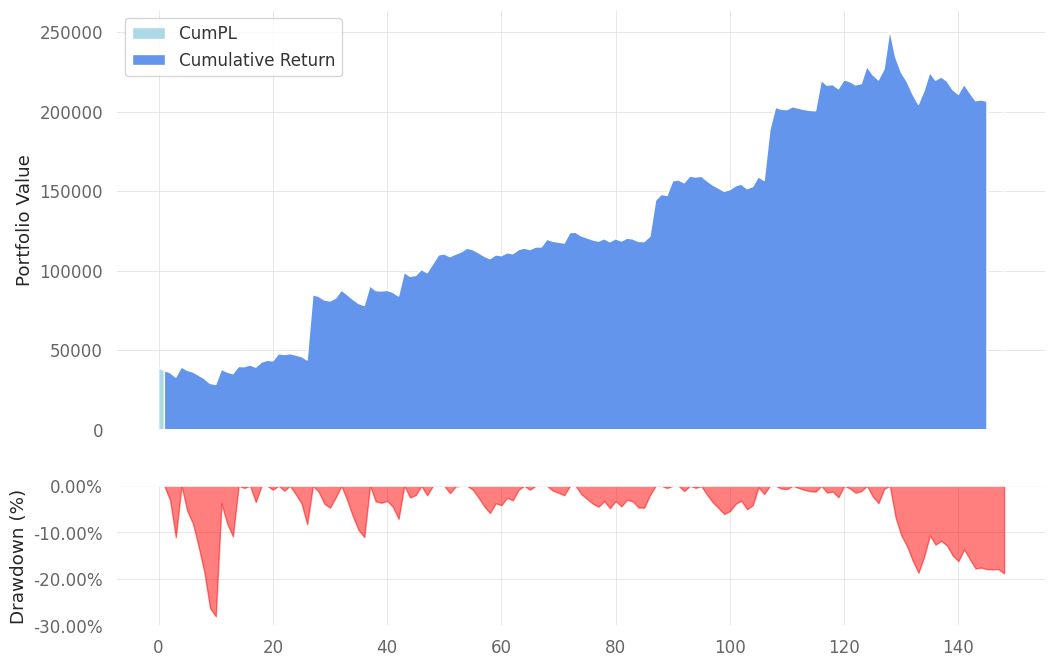

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the cumulative return and drawdown
cumulative_return = (1 + df['CumPL'].pct_change()).cumprod()
drawdown = (cumulative_return.cummax() - cumulative_return) / cumulative_return.cummax()

# Invert the drawdown so it shows a negative number
drawdown = -1 * drawdown

# Create a stacked line plot with drawdown plot beneath it
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax[0].stackplot(df.index, df['CumPL'], cumulative_return-df['CumPL'], labels=['CumPL', 'Cumulative Return'], colors=['lightblue', 'cornflowerblue'])
ax[1].fill_between(df.index, drawdown, 0, color='red', alpha=0.5)
ax[1].set_ylim(-0.3, 0)
ax[0].legend(loc='upper left')
ax[0].set_ylabel('Portfolio Value')
ax[1].set_ylabel('Drawdown (%)')
ax[1].yaxis.set_major_formatter('{x:.2%}')
plt.show()

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# calculate daily returns
daily_returns = df['CumPL'].pct_change()

# calculate portfolio statistics
cumulative_return = (df['CumPL'].iloc[-1] / df['CumPL'].iloc[0]) - 1
average_daily_return = daily_returns.mean()
std_daily_return = daily_returns.std()
annualized_volatility = std_daily_return * np.sqrt(252)
sharpe_ratio = np.sqrt(252) * (average_daily_return / std_daily_return)
sortino_ratio = np.sqrt(252) * (average_daily_return / daily_returns[daily_returns < 0].std())
var_95 = norm.ppf(0.05, average_daily_return, std_daily_return) * df['CumPL'].iloc[-1]
daily_var_95 = -var_95 / len(df.index)
average_monthly_return = ((1 + cumulative_return) ** (1 / len(df.index)) - 1) * 100



# display portfolio statistics
print(f"Cumulative return: {cumulative_return.item():.2%}")
print(f"Average daily return: {average_daily_return.item():.2%}")
print(f"Daily return volatility: {std_daily_return.item():.2%}")
print(f"Annualized volatility: {annualized_volatility.item():.2%}")
print(f"Sharpe ratio: {sharpe_ratio.item():.2f}")
print(f"Sortino ratio: {sortino_ratio.item():.2f}")
print(f"95% VaR (1 day): {var_95.item():.2f}")
print(f"Daily VaR (95%, 1 day): {daily_var_95.item():.2f}")
print(f"Average monthly return: {average_monthly_return:.2f}%")




Cumulative return: 423.92%
Average daily return: 1.44%
Daily return volatility: 9.36%
Annualized volatility: 148.55%
Sharpe ratio: 2.44
Sortino ratio: 12.80
95% VaR (1 day): -28505.94
Daily VaR (95%, 1 day): 191.32
Average monthly return: 1.12%


In [26]:
# Drop all columns except '#', 'Date/Time', and 'Profit/Loss'
df = df[['Date', 'rtnPerc']]

# Convert the date column to a pandas datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
df.set_index('Date', inplace=True)

df.index = pd.to_datetime(df.index, utc=True).tz_localize(None)


df.head()


<ipython-input-26-68376a937361>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


,rtnPerc
Date,
2013-05-28,-0.025000
2013-05-30,-0.046923
2013-06-07,-0.030670
2013-06-24,-0.082154
2013-06-28,0.195646


[Performance Metrics]

                           Strategy
-------------------------  ----------
Start Period               2013-05-28
End Period                 2023-03-03
Risk-Free Rate             0.0%
Time in Market             99.0%

Cumulative Return          410.83%
CAGR﹪                     18.17%

Sharpe                     2.41
Prob. Sharpe Ratio         99.96%
Smart Sharpe               2.2
Sortino                    10.94
Smart Sortino              10.01
Sortino/√2                 7.74
Smart Sortino/√2           7.08
Omega                      2.2

Max Drawdown               -27.95%
Longest DD Days            352
Volatility (ann.)          148.13%
Calmar                     0.65
Skew                       7.03
Kurtosis                   64.8

Expected Daily %           1.1%
Expected Monthly %         2.01%
Expected Yearly %          15.98%
Kelly Criterion            22.63%
Risk of Ruin               0.0%
Daily Value-at-Risk        -13.93%
Expected Shortfall (cVaR)  -13.93%


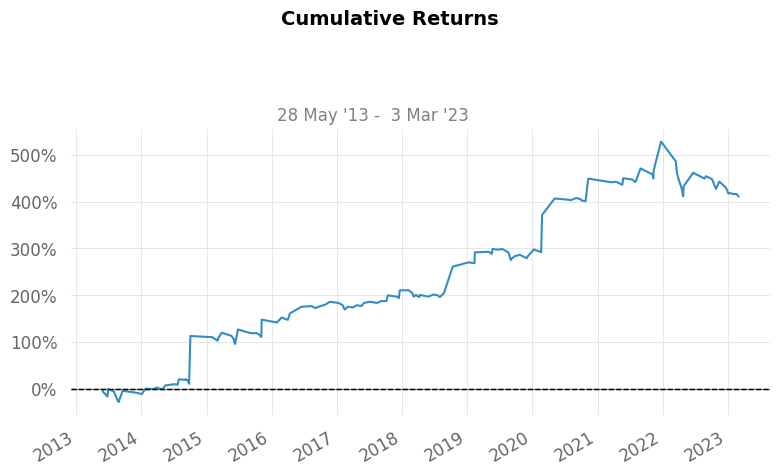

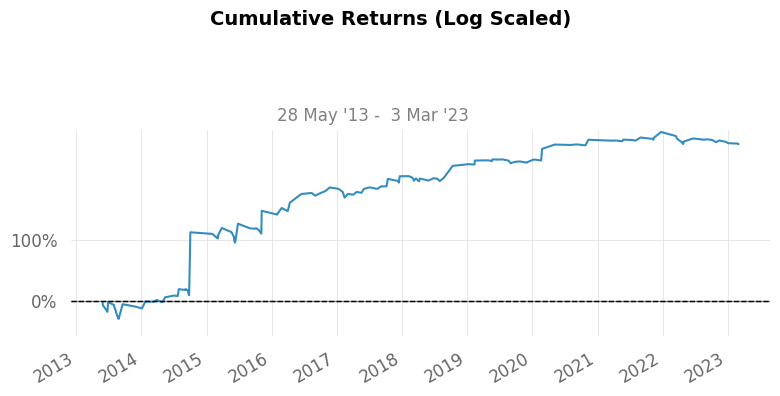

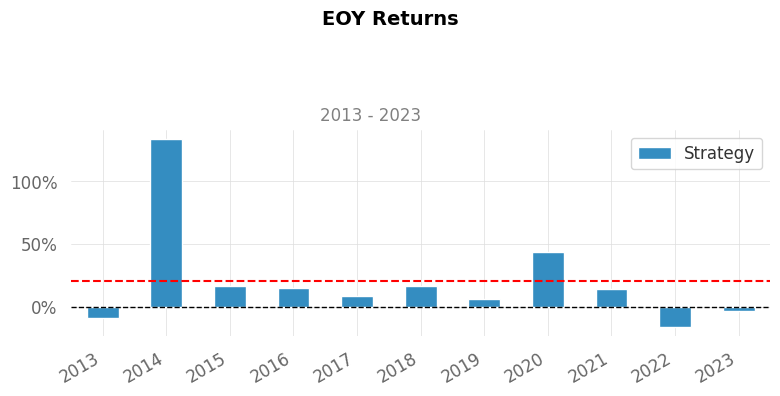

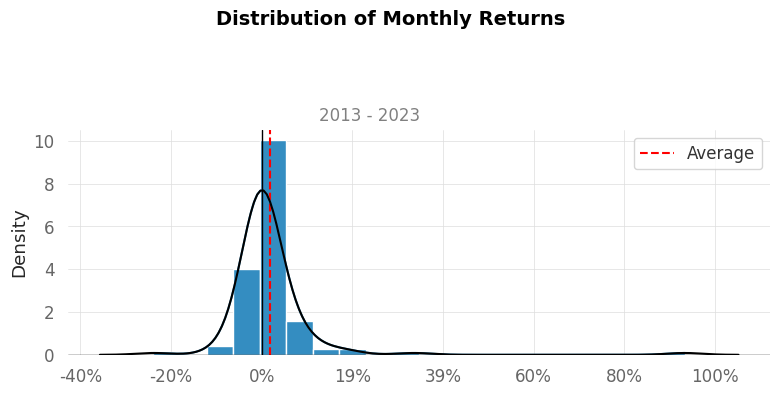

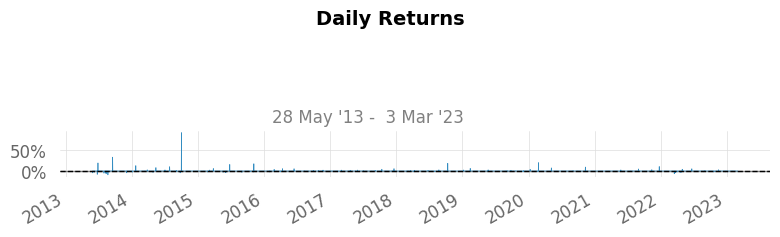

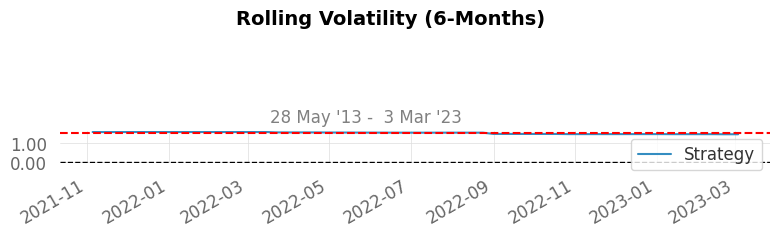

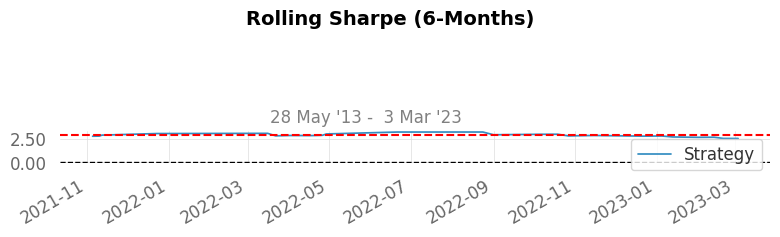

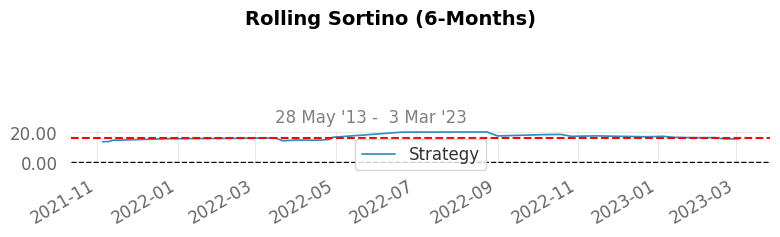

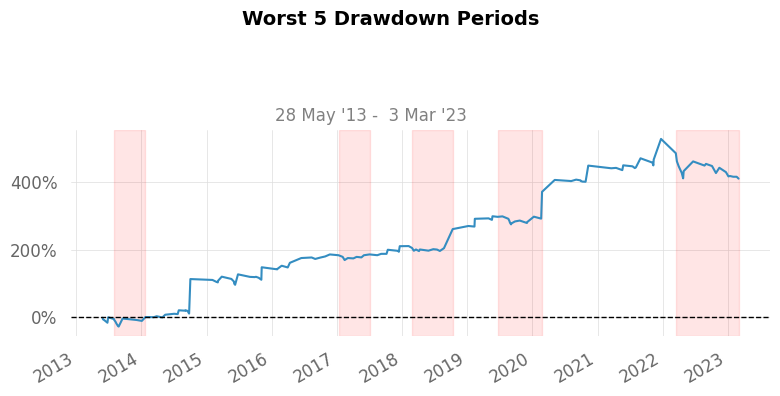

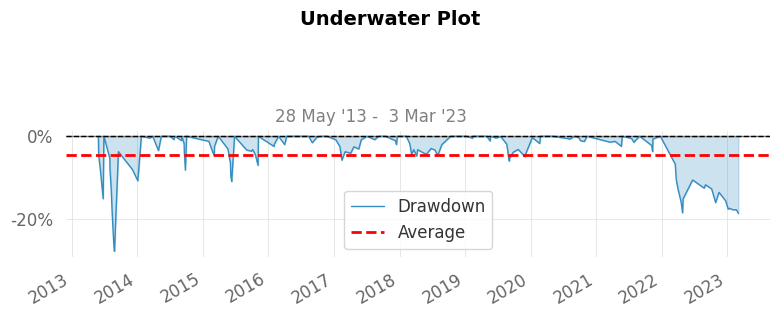

/usr/local/lib/python3.9/dist-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


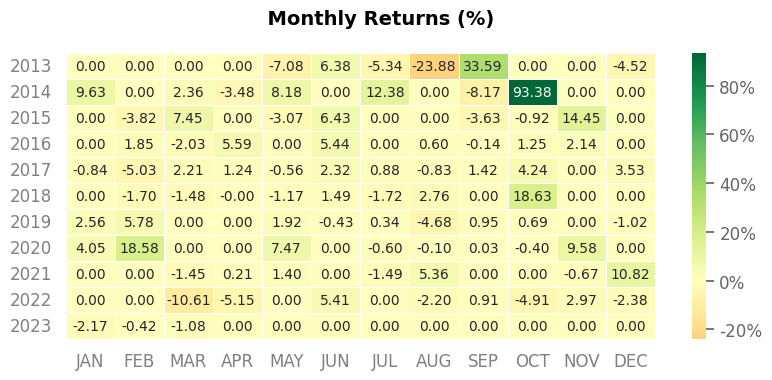

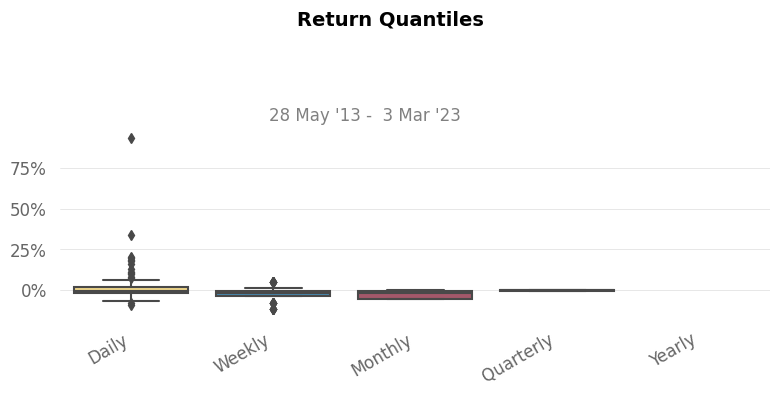

In [27]:
#Convert dataframe to a series
series = pd.Series(df.rtnPerc, index=df.index)
# reset the index to ensure each row has a unique index
df = df.reset_index()

#calc the quantstats report
qs.extend_pandas()
qs.reports.full(series)

In [29]:
#qs.reports.html(series,title='ES Long Only')